# 순환신경망(RNN) 기초

RNN의 API의 사용법과, input shape, output shape 등의 기본적인 것들에 대해서 알아봅니다.

In [66]:
## 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


## 단순 데이터 준비

In [5]:
# 'hello'의 각 문자를 원핫인코딩한다.
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

# 1. 일대일 RNN의 구현

![image](https://cloud.githubusercontent.com/assets/901975/23348727/cc981856-fce7-11e6-83ea-4b187473466b.png)

##  문제1: 은닉층 유닛을 2로 해서 위의 그래프를 구현해보라. 


In [6]:
### 힌트: SimpleRNN을 사용하고, units= hidden_size, return_sequences=True, return_state=True)로 설정해보라.
x_data = np.array([[h]], dtype=np.float32)

hidden_size = 2

rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True,
                       return_state=True) # layers.SimpleRNNCell + layers.RNN

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[0.725664  0.6145646]]], shape: (1, 1, 2)
states: [[0.725664  0.6145646]], shape: (1, 2)


## 2. 위의 RNN을 n 시퀀스로 펼쳐보자.

![image](https://cloud.githubusercontent.com/assets/901975/23383634/649efd0a-fd82-11e6-925d-8041242743b0.png)

# 문제2: 위의 그래프를 구현해보라.

In [13]:
# 여전히 One cell RNN을 사용한다. 단 sequence가 5가 된다. 
# input_dim (4) -> output_dim (2) 

x_data = np.array([[h, e, l, l, o]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[ 0.5141706   0.5632393 ]
  [-0.00800676 -0.6405227 ]
  [-0.0411533   0.7506102 ]
  [-0.67220473 -0.18034245]
  [ 0.659823    0.4654067 ]]], shape: (1, 5, 2) 

states: [[0.659823  0.4654067]], shape: (1, 2)


# 3.배치로 입력을 넣어보자.

![image](https://cloud.githubusercontent.com/assets/901975/23383681/9943a9fc-fd82-11e6-8121-bd187994e249.png)

# 문제3: 위의 그래프를 구현해보라.

In [16]:
# 여전히 One cell RNN을 사용한다. 이번에는 배치가 3이다. 
# input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 배치는 다음으로 하자 (임의)
# 'hello', 'eolll', 'lleel'

x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[ 0.38565707 -0.7283051 ]
  [-0.86563635  0.90551156]
  [ 0.3020678  -0.46015304]
  [-0.63194746  0.74245936]
  [ 0.73358864 -0.8415196 ]]

 [[-0.75665504  0.63250536]
  [ 0.7892497  -0.80984336]
  [-0.83449435  0.8723753 ]
  [ 0.27601174 -0.4317275 ]
  [-0.61747694  0.728511  ]]

 [[-0.44607365  0.44095033]
  [-0.06973916 -0.0013237 ]
  [-0.72528976  0.6299931 ]
  [-0.3049414   0.06031467]
  [-0.17861167  0.37071404]]], shape: (3, 5, 2) 

states: [[ 0.73358864 -0.8415196 ]
 [-0.61747694  0.728511  ]
 [-0.17861167  0.37071404]], shape: (3, 2)


# 4. No return sequences

### 문제4: return_sequences=False로 놓고 결과를 확인하라.

In [20]:
# return_sequences=False로 놓고 결과를 확인하라.
rnn = layers.SimpleRNN(units=2, return_sequences=False, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[ 0.9319291  -0.8270599 ]
 [ 0.63164204 -0.0818404 ]
 [ 0.20031674  0.89215475]], shape: (3, 2) 

states: [[ 0.9319291  -0.8270599 ]
 [ 0.63164204 -0.0818404 ]
 [ 0.20031674  0.89215475]], shape: (3, 2)


# 5. No return state
### 문제5: return_state=False도 추가하고 결과를 살펴보자.

In [23]:
# return_state=False도 추가하고 결과를 살펴보자.
rnn = layers.SimpleRNN(units=2, return_sequences=False, return_state=False) 

outputs= rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[ 0.44517052  0.59081674]
 [-0.5311963   0.10264371]
 [-0.9471423  -0.86658674]], shape: (3, 2) 



# 6. LSTM을 사용해보자.

### 문제6: LSTM을 구축해보라. LSTM의 출력은 outputs(출력), h_states(은닉상태), 그리고 c_states(셀상태)가 나온다.

In [26]:
rnn = layers.LSTM(units=2, return_sequences=False, return_state=True)    
outputs, h_states, c_states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('hidden_states: {}, shape: {}'.format(h_states, h_states.shape))
print('cell_states: {}, shape: {}'.format(c_states, c_states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.03007089  0.00614784]
 [ 0.09164225  0.01074089]
 [ 0.04958523  0.19709364]], shape: (3, 2) 

hidden_states: [[-0.03007089  0.00614784]
 [ 0.09164225  0.01074089]
 [ 0.04958523  0.19709364]], shape: (3, 2)
cell_states: [[-0.06849447  0.01624016]
 [ 0.18667966  0.01673114]
 [ 0.10157224  0.30794397]], shape: (3, 2)


## 7. GRU와 비교해보자


### 문제7: GRU를 구축하라 GRU의 출력은 outputs(출력)과 state(은닉상태)이다. (굳이 cell state를 사용하지 않는다.)

In [27]:
rnn = layers.GRU(units=2, return_sequences=False, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.10997838 -0.00963314]
 [ 0.04375338  0.36001536]
 [-0.00596121  0.19069935]], shape: (3, 2) 

states: [[-0.10997838 -0.00963314]
 [ 0.04375338  0.36001536]
 [-0.00596121  0.19069935]], shape: (3, 2)


# 8.RNN을 적층으로 쌓아보자 (Stacked RNN)

#### 문제8. LSTM을 3개층을 쌓아보라

In [35]:
model = keras.Sequential()
model.add(layers.LSTM(2, return_sequences=True, input_shape=(5,4)))
model.add(layers.LSTM(2, return_sequences=True))
model.add(layers.LSTM(2, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 2)              56        
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 2)              40        
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 2)              40        
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


# [실습1] RNN을 이용하여 MNIST Classification 학습하기 
  

MNIST Image를 한 line씩 RNN에 입력하여 classification을 하는 실습을 해보겠습니다.

In [29]:
## 하이퍼 파라미터
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

In [30]:
## Data 준비
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [31]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

n_train = train_images.shape[0]
n_test = test_images.shape[0]
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [32]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size).repeat()

### 문제9: LSTM 모델을 구축해보라. (LSTM -> Dense를 쌓고 softmax를 사용해보라.)

In [36]:
## Model 만들기 (아리 서머리 참조)
def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(units=128, return_sequences=False, input_shape=(28,28)))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [37]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [38]:
## model compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
## Training
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

In [40]:
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/15
600/600 [==============================] - 20s 34ms/step - loss: 0.4710 - accuracy: 0.8481 - val_loss: 0.1724 - val_accuracy: 0.9451
Epoch 2/15
600/600 [==============================] - 21s 35ms/step - loss: 0.1424 - accuracy: 0.9571 - val_loss: 0.1254 - val_accuracy: 0.9607
Epoch 3/15
600/600 [==============================] - 22s 36ms/step - loss: 0.0975 - accuracy: 0.9706 - val_loss: 0.0884 - val_accuracy: 0.9715
Epoch 4/15
600/600 [==============================] - 23s 38ms/step - loss: 0.0756 - accuracy: 0.9769 - val_loss: 0.0733 - val_accuracy: 0.9757
Epoch 5/15
600/600 [==============================] - 23s 38ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0617 - val_accuracy: 0.9808
Epoch 6/15
600/600 [==============================] - 23s 38ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0559 - val_accuracy: 0.9818
Epoch 7/15
600/600 [==============================] - 24s 39ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0618 - val_accuracy:

In [41]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

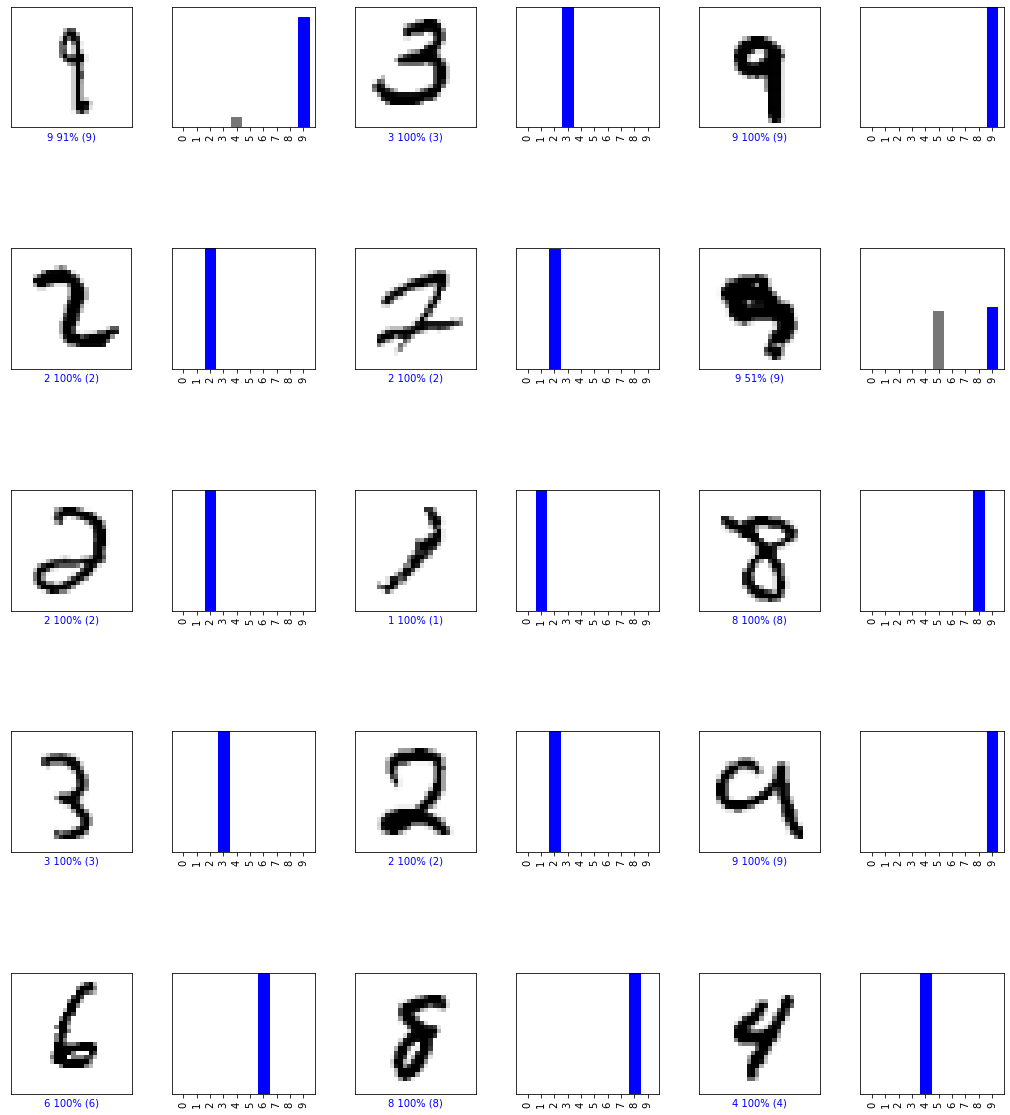

In [42]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# [실습2] Stock Prediction with RNN  
### RNN을 이용한 간단한 주식 예측 모델을 학습해보겠습니다.

In [43]:
## 하이퍼 파라미터
seq_length = 7
data_dim = 5
hidden_size = 10
output_dim = 1
learning_rate = 0.001
training_epochs = 500
batch_size = 25

In [44]:
## 데이터 전처리
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [45]:
# ## Google Drive 동기화
# from google.colab import drive
# drive.mount('/content/drive')

In [46]:
## 데이타 로딩
# 시가, 고가, 저가, 거래량, 종가의 순으로 데이터가 저장돼있다.
xy = np.loadtxt('data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # 데이터를 보면 날짜 순서가 거꾸로 돼있어 바로 잡는다.
xy = MinMaxScaler(xy).astype(np.float32) # 정규화하고,
x = xy           # 일단 모든 데이터를 다 사용하는데.
y = xy[:, [-1]]  # 종가를 레이블로 만든다.

In [47]:
# 데이터 구축  (LSTM에서가장 중요한 부분 중 하나)
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # 다음날의 종가
    dataX.append(_x)
    dataY.append(_y)

[[2.1375105e-01 2.0817982e-01 1.9179183e-01 4.6607511e-04 1.9209240e-01]
 [1.9393504e-01 2.0364192e-01 2.0866457e-01 2.9846733e-03 1.9655156e-01]
 [2.1051645e-01 2.0528941e-01 2.0355874e-01 2.5992651e-04 1.8774973e-01]
 [1.8667877e-01 2.0948057e-01 2.0878184e-01 0.0000000e+00 2.1744815e-01]
 [3.0697387e-01 3.1463414e-01 2.1899366e-01 1.2476472e-02 2.1698189e-01]
 [2.1914211e-01 2.6390722e-01 2.2468640e-01 4.5632339e-01 2.2496748e-01]
 [2.3312993e-01 2.3641916e-01 1.6268273e-01 5.7017118e-01 1.4744274e-01]] -> [0.13289961]
[[1.9393504e-01 2.0364192e-01 2.0866457e-01 2.9846733e-03 1.9655156e-01]
 [2.1051645e-01 2.0528941e-01 2.0355874e-01 2.5992651e-04 1.8774973e-01]
 [1.8667877e-01 2.0948057e-01 2.0878184e-01 0.0000000e+00 2.1744815e-01]
 [3.0697387e-01 3.1463414e-01 2.1899366e-01 1.2476472e-02 2.1698189e-01]
 [2.1914211e-01 2.6390722e-01 2.2468640e-01 4.5632339e-01 2.2496748e-01]
 [2.3312993e-01 2.3641916e-01 1.6268273e-01 5.7017118e-01 1.4744274e-01]
 [1.3431200e-01 1.5175878e-01 1.16

 [0.09465072 0.10123423 0.10631306 0.20806669 0.1003449 ]] -> [0.11896849]
[[0.12895003 0.13132344 0.12999344 0.1888859  0.12022156]
 [0.11324289 0.1142411  0.12394871 0.13612083 0.12007584]
 [0.10721065 0.11567471 0.12236416 0.11382988 0.1129937 ]
 [0.10639469 0.11955947 0.12039798 0.12406561 0.13045144]
 [0.10592847 0.10669713 0.10775088 0.22924621 0.09533209]
 [0.09465072 0.10123423 0.10631306 0.20806669 0.1003449 ]
 [0.08010929 0.11045469 0.09665887 0.16701622 0.11896849]] -> [0.0976636]
[[0.11324289 0.1142411  0.12394871 0.13612083 0.12007584]
 [0.10721065 0.11567471 0.12236416 0.11382988 0.1129937 ]
 [0.10639469 0.11955947 0.12039798 0.12406561 0.13045144]
 [0.10592847 0.10669713 0.10775088 0.22924621 0.09533209]
 [0.09465072 0.10123423 0.10631306 0.20806669 0.1003449 ]
 [0.08010929 0.11045469 0.09665887 0.16701622 0.11896849]
 [0.11198978 0.11664006 0.11150688 0.15275611 0.0976636 ]] -> [0.10430872]
[[0.10721065 0.11567471 0.12236416 0.11382988 0.1129937 ]
 [0.10639469 0.1195594

 [0.43813014 0.43182942 0.42456862 0.1402438  0.43754005]] -> [0.4160314]
[[0.39441848 0.4024656  0.39463794 0.13142422 0.40813333]
 [0.39843997 0.39578876 0.40476158 0.15220937 0.38779035]
 [0.3808388  0.39621094 0.40429217 0.11621404 0.4041114 ]
 [0.38981414 0.4012806  0.40963256 0.13292104 0.398399  ]
 [0.40703663 0.4390004  0.42723882 0.20851484 0.44074604]
 [0.43813014 0.43182942 0.42456862 0.1402438  0.43754005]
 [0.42422977 0.42402813 0.41711536 0.12512325 0.4160314 ]] -> [0.41145566]
[[0.39843997 0.39578876 0.40476158 0.15220937 0.38779035]
 [0.3808388  0.39621094 0.40429217 0.11621404 0.4041114 ]
 [0.38981414 0.4012806  0.40963256 0.13292104 0.398399  ]
 [0.40703663 0.4390004  0.42723882 0.20851484 0.44074604]
 [0.43813014 0.43182942 0.42456862 0.1402438  0.43754005]
 [0.42422977 0.42402813 0.41711536 0.12512325 0.4160314 ]
 [0.4220442  0.42622486 0.42163137 0.1614502  0.41145566]] -> [0.4902917]
[[0.3808388  0.39621094 0.40429217 0.11621404 0.4041114 ]
 [0.38981414 0.4012806 

[[0.7265397  0.72107553 0.7276898  0.11498611 0.71869725]
 [0.72377145 0.7197748  0.729157   0.10864928 0.70980805]
 [0.7091425  0.71639305 0.7143678  0.12056109 0.7301802 ]
 [0.74166393 0.74688685 0.75325114 0.152299   0.75533175]
 [0.7557975  0.7553557  0.77802914 0.10104867 0.7596453 ]
 [0.75570995 0.7660214  0.7779967  0.16145918 0.77654904]
 [0.77459353 0.7863987  0.7915125  0.13875593 0.798728  ]] -> [0.76177275]
[[0.72377145 0.7197748  0.729157   0.10864928 0.70980805]
 [0.7091425  0.71639305 0.7143678  0.12056109 0.7301802 ]
 [0.74166393 0.74688685 0.75325114 0.152299   0.75533175]
 [0.7557975  0.7553557  0.77802914 0.10104867 0.7596453 ]
 [0.75570995 0.7660214  0.7779967  0.16145918 0.77654904]
 [0.77459353 0.7863987  0.7915125  0.13875593 0.798728  ]
 [0.8009662  0.7917461  0.7681256  0.18128529 0.76177275]] -> [0.7581005]
[[0.7091425  0.71639305 0.7143678  0.12056109 0.7301802 ]
 [0.74166393 0.74688685 0.75325114 0.152299   0.75533175]
 [0.7557975  0.7553557  0.77802914 0.10

 [0.9102162  0.9129698  0.9261711  0.10284127 0.9204647 ]] -> [0.9239037]
[[0.8888849  0.8821869  0.8909586  0.18063995 0.88349485]
 [0.87174994 0.88655144 0.89333546 0.13604912 0.8917574 ]
 [0.8985306  0.89608973 0.91789615 0.13018733 0.90038407]
 [0.88894325 0.88357425 0.90287215 0.10453527 0.899947  ]
 [0.90144473 0.9090966  0.9220337  0.11000269 0.9163552 ]
 [0.9102162  0.9129698  0.9261711  0.10284127 0.9204647 ]
 [0.91753066 0.909559   0.93013245 0.08799857 0.9239037 ]] -> [0.9358821]
[[0.87174994 0.88655144 0.89333546 0.13604912 0.8917574 ]
 [0.8985306  0.89608973 0.91789615 0.13018733 0.90038407]
 [0.88894325 0.88357425 0.90287215 0.10453527 0.899947  ]
 [0.90144473 0.9090966  0.9220337  0.11000269 0.9163552 ]
 [0.9102162  0.9129698  0.9261711  0.10284127 0.9204647 ]
 [0.91753066 0.909559   0.93013245 0.08799857 0.9239037 ]
 [0.9239126  0.92282605 0.9455088  0.10049296 0.9358821 ]] -> [0.9521156]
[[0.8985306  0.89608973 0.91789615 0.13018733 0.90038407]
 [0.88894325 0.88357425 

In [51]:
print(np.array(dataX).shape)
print(np.array(dataY).shape)

(725, 7, 5)
(725, 1)


In [54]:
## 훈련/테스트셋 분리
train_size = int(len(dataY) * 0.7 + 18)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(525, 7, 5) (525, 1)
(200, 7, 5) (200, 1)


In [55]:
## 데이터셋을 만들자
train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((testX, testY)).prefetch(
                buffer_size=batch_size).batch(batch_size)

# 문제10: 2층 LSTM 모델을 만들어보자  2층 LSTM -> Dense로 구축해보자.

In [57]:
## 모델을 만들자.
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=hidden_size, return_sequences=True,
                                     input_shape=(trainX.shape[1],trainX.shape[2])))
    model.add(keras.layers.LSTM(units=hidden_size))
    model.add(keras.layers.Dense(units=output_dim))
    return model

In [58]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 7, 10)             640       
_________________________________________________________________
lstm_7 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [63]:
## 손실함수와 최적화 정의
def rmse_opt(learning_rate):
    return keras.optimizers.RMSprop(learning_rate)

model.compile(optimizer=rmse_opt(learning_rate),
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])  

In [64]:
## 적합화
model.fit(train_dataset, epochs=training_epochs,
          steps_per_epoch=trainX.shape[0]//batch_size,
          validation_data=test_dataset,
          validation_steps=testX.shape[0]//batch_size)

Epoch 1/500
21/21 [==============================] - 1s 55ms/step - loss: 8.1905e-04 - root_mean_squared_error: 0.0286 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0378
Epoch 2/500
21/21 [==============================] - 0s 9ms/step - loss: 7.5592e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 3/500
21/21 [==============================] - 0s 8ms/step - loss: 7.8141e-04 - root_mean_squared_error: 0.0280 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0428
Epoch 4/500
21/21 [==============================] - 0s 8ms/step - loss: 7.6757e-04 - root_mean_squared_error: 0.0277 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0379
Epoch 5/500
21/21 [==============================] - 0s 8ms/step - loss: 7.5789e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0428
Epoch 6/500
21/21 [==============================] - 0s 7ms/step - loss: 7.6341e-04 - root_mean_squared_error: 0.0276 - val_

21/21 [==============================] - 0s 8ms/step - loss: 7.5819e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 48/500
21/21 [==============================] - 0s 8ms/step - loss: 7.4930e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0463
Epoch 49/500
21/21 [==============================] - 0s 8ms/step - loss: 7.4374e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419
Epoch 50/500
21/21 [==============================] - 0s 8ms/step - loss: 7.6706e-04 - root_mean_squared_error: 0.0277 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0435
Epoch 51/500
21/21 [==============================] - 0s 8ms/step - loss: 7.5739e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411
Epoch 52/500
21/21 [==============================] - 0s 7ms/step - loss: 7.4416e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.

21/21 [==============================] - 0s 8ms/step - loss: 7.1305e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 94/500
21/21 [==============================] - 0s 8ms/step - loss: 7.3701e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0467
Epoch 95/500
21/21 [==============================] - 0s 7ms/step - loss: 7.4611e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0511
Epoch 96/500
21/21 [==============================] - 0s 7ms/step - loss: 7.5283e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 97/500
21/21 [==============================] - 0s 7ms/step - loss: 7.1589e-04 - root_mean_squared_error: 0.0268 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0680
Epoch 98/500
21/21 [==============================] - 0s 8ms/step - loss: 7.4284e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.

21/21 [==============================] - 0s 8ms/step - loss: 7.4958e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 140/500
21/21 [==============================] - 0s 7ms/step - loss: 7.0752e-04 - root_mean_squared_error: 0.0266 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0444
Epoch 141/500
21/21 [==============================] - 0s 8ms/step - loss: 7.4090e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0400
Epoch 142/500
21/21 [==============================] - 0s 7ms/step - loss: 7.2607e-04 - root_mean_squared_error: 0.0269 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 143/500
21/21 [==============================] - 0s 8ms/step - loss: 7.0841e-04 - root_mean_squared_error: 0.0266 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0395
Epoch 144/500
21/21 [==============================] - 0s 8ms/step - loss: 7.1960e-04 - root_mean_squared_error: 0.0268 - val_los

21/21 [==============================] - 0s 7ms/step - loss: 7.2361e-04 - root_mean_squared_error: 0.0269 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 186/500
21/21 [==============================] - 0s 8ms/step - loss: 7.1013e-04 - root_mean_squared_error: 0.0266 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0422
Epoch 187/500
21/21 [==============================] - 0s 8ms/step - loss: 7.1573e-04 - root_mean_squared_error: 0.0268 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 188/500
21/21 [==============================] - 0s 8ms/step - loss: 7.2391e-04 - root_mean_squared_error: 0.0269 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0548
Epoch 189/500
21/21 [==============================] - 0s 8ms/step - loss: 7.0969e-04 - root_mean_squared_error: 0.0266 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475
Epoch 190/500
21/21 [==============================] - 0s 8ms/step - loss: 7.1526e-04 - root_mean_squared_error: 0.0267 - val_los

21/21 [==============================] - 0s 8ms/step - loss: 6.9763e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 232/500
21/21 [==============================] - 0s 7ms/step - loss: 7.0239e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0401
Epoch 233/500
21/21 [==============================] - 0s 7ms/step - loss: 6.9958e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0386
Epoch 234/500
21/21 [==============================] - 0s 7ms/step - loss: 6.9443e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0505
Epoch 235/500
21/21 [==============================] - 0s 7ms/step - loss: 7.3020e-04 - root_mean_squared_error: 0.0270 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 236/500
21/21 [==============================] - 0s 7ms/step - loss: 7.1541e-04 - root_mean_squared_error: 0.0267 - val_los

21/21 [==============================] - 0s 7ms/step - loss: 6.9617e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 278/500
21/21 [==============================] - 0s 7ms/step - loss: 7.0837e-04 - root_mean_squared_error: 0.0266 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0526
Epoch 279/500
21/21 [==============================] - 0s 7ms/step - loss: 6.8737e-04 - root_mean_squared_error: 0.0262 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 280/500
21/21 [==============================] - 0s 7ms/step - loss: 6.8726e-04 - root_mean_squared_error: 0.0262 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0514
Epoch 281/500
21/21 [==============================] - 0s 8ms/step - loss: 6.8325e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0427
Epoch 282/500
21/21 [==============================] - 0s 8ms/step - loss: 6.9616e-04 - root_mean_squared_error: 0.0264 - val_los

21/21 [==============================] - 0s 7ms/step - loss: 7.0116e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0495
Epoch 324/500
21/21 [==============================] - 0s 8ms/step - loss: 6.9671e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 325/500
21/21 [==============================] - 0s 7ms/step - loss: 6.8246e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0526
Epoch 326/500
21/21 [==============================] - 0s 8ms/step - loss: 6.9843e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 327/500
21/21 [==============================] - 0s 7ms/step - loss: 7.1415e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 328/500
21/21 [==============================] - 0s 7ms/step - loss: 6.7979e-04 - root_mean_squared_error: 0.0261 - val_los

21/21 [==============================] - 0s 7ms/step - loss: 6.6807e-04 - root_mean_squared_error: 0.0258 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0488
Epoch 370/500
21/21 [==============================] - 0s 7ms/step - loss: 6.8183e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0558
Epoch 371/500
21/21 [==============================] - 0s 7ms/step - loss: 6.9347e-04 - root_mean_squared_error: 0.0263 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0658
Epoch 372/500
21/21 [==============================] - 0s 7ms/step - loss: 6.8297e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0423
Epoch 373/500
21/21 [==============================] - 0s 7ms/step - loss: 6.9587e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 374/500
21/21 [==============================] - 0s 7ms/step - loss: 6.7798e-04 - root_mean_squared_error: 0.0260 - val_los

21/21 [==============================] - 0s 7ms/step - loss: 6.6847e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 416/500
21/21 [==============================] - 0s 8ms/step - loss: 6.8012e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 417/500
21/21 [==============================] - 0s 8ms/step - loss: 6.6739e-04 - root_mean_squared_error: 0.0258 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0563
Epoch 418/500
21/21 [==============================] - 0s 7ms/step - loss: 6.7305e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0533
Epoch 419/500
21/21 [==============================] - 0s 7ms/step - loss: 6.6172e-04 - root_mean_squared_error: 0.0257 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0449
Epoch 420/500
21/21 [==============================] - ETA: 0s - loss: 5.3243e-04 - root_mean_squared_error: 0.023 - 0s 8ms/step 

21/21 [==============================] - 0s 7ms/step - loss: 6.6212e-04 - root_mean_squared_error: 0.0257 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0485
Epoch 462/500
21/21 [==============================] - 0s 7ms/step - loss: 6.8928e-04 - root_mean_squared_error: 0.0263 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416
Epoch 463/500
21/21 [==============================] - 0s 7ms/step - loss: 6.4050e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0414
Epoch 464/500
21/21 [==============================] - 0s 7ms/step - loss: 7.0375e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0538
Epoch 465/500
21/21 [==============================] - 0s 7ms/step - loss: 6.5338e-04 - root_mean_squared_error: 0.0256 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 466/500
21/21 [==============================] - 0s 7ms/step - loss: 6.5966e-04 - root_mean_squared_error: 0.0257 - val_los

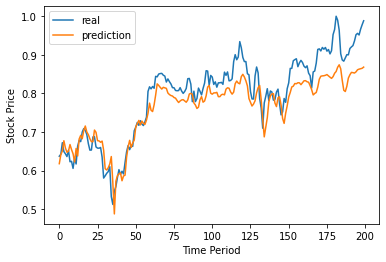

In [65]:
## 결과 확인
prediction = model.predict(test_dataset)

plt.plot(testY)
plt.plot(prediction)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend(['real', 'prediction'])
plt.show()